# K-Nearest Neighbors Algorithm
Read article - [Significance of k-Nearest Neighbors in Machine Learning](https://medium.com/@madhuri15/significance-of-k-nearest-neighbors-in-machine-learning-572f0daa2841)

---

K-Nearest Neighbors(KNN) is a simple and yet powerful non-parametric machine learning algorithm. It is supervised machine learning algorithm that can be used for both classification and regression tasks. 

It works with simple principle of similarity, and doesn't make any assumptions about the underlying data distributions.

It works by 
- Finding the k closest points to a query point (new data point to be predicted) and
- Assigning the majority label (for classification) or
- The average value (for regression) of those points to the query point.

## K-Negibhors Classifier
---
#### Import required libraries

In [87]:
# Import required liraries
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot style settings
knn_palette = sns.color_palette(['#054a91', '#f17300'])

# for generating random dataset
from sklearn.datasets import make_blobs

## for building model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from mlxtend.plotting import plot_decision_regions


#### Generate random dataset
We will be using randomly generated data with help of `make_blobs` class of `sklearn.datasets` module. 

The `make_blobs` allows us to create a clusters of data points with different characteristics, such as the number of clusters, the standard deviation of each cluster. You can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)

Let's create a dataset of 1000 samples with 2 features with `random_state` 42 for reproducible output across multiple function calls.

In [5]:
# Randomly generated data
X, y = make_blobs(n_samples = 1000, 
                            centers = ((-3, 3), (0, 0)),
                            random_state = 42)

In [6]:
# Check the shape
print(X.shape, y.shape)

(1000, 2) (1000,)


In [7]:
# convert them into the dataframe using pandas
data = pd.DataFrame(X, columns = ['feature_1', 'feature_2'])
data['target'] = y

data.head()

,feature_1,feature_2,target
0,1.024063,0.592527,1
1,1.661259,-0.457096,1
2,-4.607483,3.184634,0
3,1.076007,0.021312,1
4,-3.756351,1.577746,0


#### Plot data distribution
Let's plot the scatterplot to see the distribution of randomly generated data values.

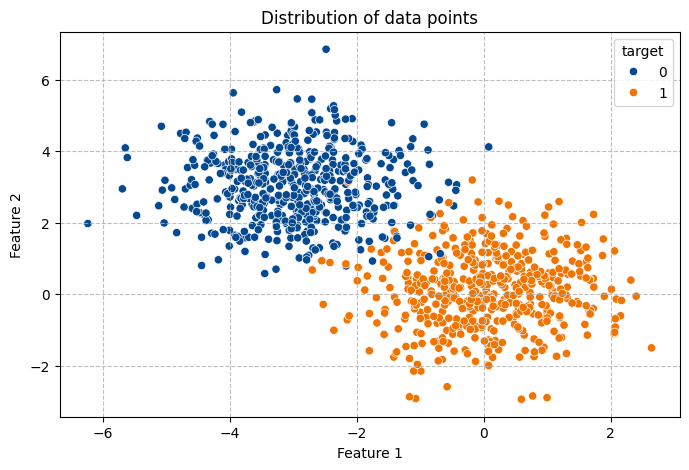

In [19]:
# Data distribution
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, 
                x = 'feature_1', 
                y = 'feature_2', 
                hue = 'target',
                palette=knn_palette)
plt.grid(ls='--', alpha=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Distribution of data points");

#### Split the data into training & test sets

In [20]:
# split the dataset into training and testing sets in ratio of 80:20.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### KNN classifier implementation

In [59]:
# create a classifier instance
clf = KNeighborsClassifier(n_neighbors = 1)

# fit the model on training data
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
# Make predictions on new data point
f1 = -0.1
f2 = 3.6

predictions = clf.predict([[f1, f2]])
predictions

array([1])

#### kneighbors

Let's visualize the prediction with nearest neighbors on the plot. You can use `kneighbors` method of classifier to get the K-neighbors of a point.

It returns distance of nearest neighbors for the given the data point and index of that nearest neighbor, for each neighbors.

In [61]:
# Get the nearest neighbors information
neighbors = clf.kneighbors([[f1, f2]])
neighbors

(array([[0.4147752]]), array([[796]], dtype=int64))

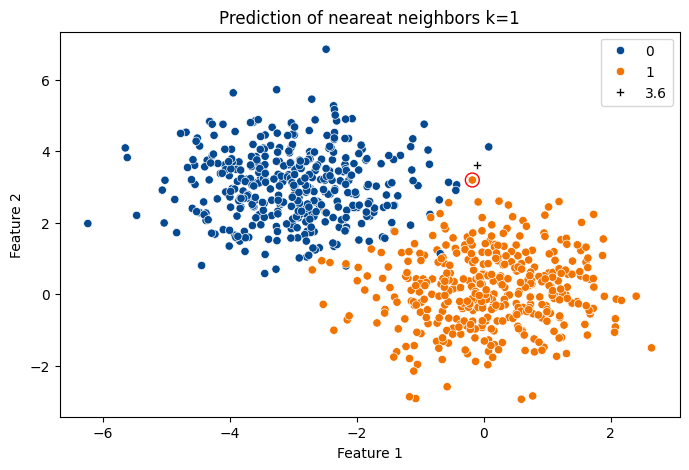

In [62]:
# Plot
fig = plt.figure(figsize=(8, 5))

# Scatter plot for data point
sns.scatterplot(x = x_train[:, 0], 
                y = x_train[:, 1], 
                hue = y_train,
                palette=knn_palette)

# plot the query point
sns.scatterplot(x=[f1], y=[f2],  
                color='#000', markers = 'P', style=[f2])

# A list to store the x-values of all neighbors
plot_x_train = []
# A list to store the y-values of all neighbors
plot_y_train = []

# Append all x- and y-values to the respective lists
for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

# Enclose all nearest neighbors
plt.scatter(plot_x_train, 
            plot_y_train, 
            s=100, facecolors='none', edgecolors='r');

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Prediction using KNN classifier with k=1", size=10);

Our model predict that the new data point plus is belongs to class 1.
Currently, classifier considering only one single neighbor point for predictions.  

Let's see how classifer make predictions for the same query point if the number of neighbors set to 2.

In [63]:
# Instantiate the classifier with two neighbors.
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train, y_train)

clf.predict([[f1, f2]])

array([0])

Now, classifier predicts class label 0 for the same query point with two nearest neighbors. 

In [64]:
# Get neighbors info
neighbors = clf.kneighbors([[f1, f2]])
neighbors

(array([[0.4147752 , 0.54950563]]), array([[796,  30]], dtype=int64))

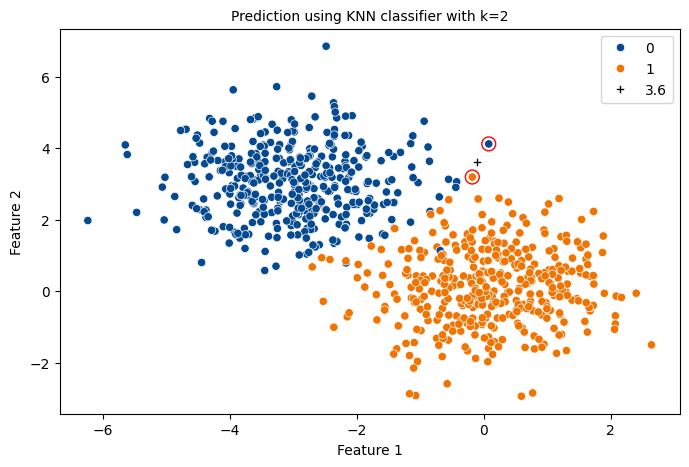

In [70]:
# plot training data
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(x = x_train[:, 0], 
                y = x_train[:, 1], 
                hue = y_train,
                palette=knn_palette)

# plot the point to be predicted
sns.scatterplot(x=[f1], y=[f2],  
                color='#000', markers = 'P', style=[f2])

# A list to store the x-values of all neighbors
plot_x_train = []
# A list to store the y-values of all neighbors
plot_y_train = []

# Append all x- and y-values to the respective lists
for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

# Enclose all nearest neighbors
plt.scatter(plot_x_train, 
            plot_y_train, 
            s=100, facecolors='none', edgecolors='r');

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Prediction using KNN classifier with k=2", size=10);

Now, classifier consider 2 nearest neighbors to make predictions, you can see the predicted label for query point is assigned to class 0.

Even though the query point is slightly closer to the orange data point rather than a blue data.

*So, let's find out why this happend?*

#### Analyzing KNeighobrs Classifier
Currently, we are using the knn classifier with 2 nearest neighbors, by keeping all other parameters to its default values.

Let's first understand the parameters of KNN classifier using `get_params()` method that returns set of all paramenter names with their corresponding values.

In [71]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

By default, nearest neighbors classifier uses uniform weights for making prediction of the new values, meaning the predictions are calculated by simple majority votes of the nearest neighbors treating all the neighbors equally. In case of tie, smallest index value is consider.

However, sometime it is better to weight the neighbors such that nearer neighbors contribute more to the fit. 
 
When weights are set to `distance` value, the neighbors will have different weights according to their distance from the query point. The nearer neighbors will assigned more weights while neighbor that are far from the query point will have less weights.

Now, let's see the effect of weights on prediction, if we set `weights` to `distance`.

In [72]:
## Classifier with distance weights.
clf = KNeighborsClassifier(n_neighbors=2, weights='distance')
clf.fit(x_train, y_train)

clf.predict([[f1, f2]])

array([1])

Now, predictions are made by considering distance rather than the indexing position of data points.

#### Decision boundaries

Let's see how the change in number of neighbors can affect the classifier decision by observing the decision boundaries of each cluster.

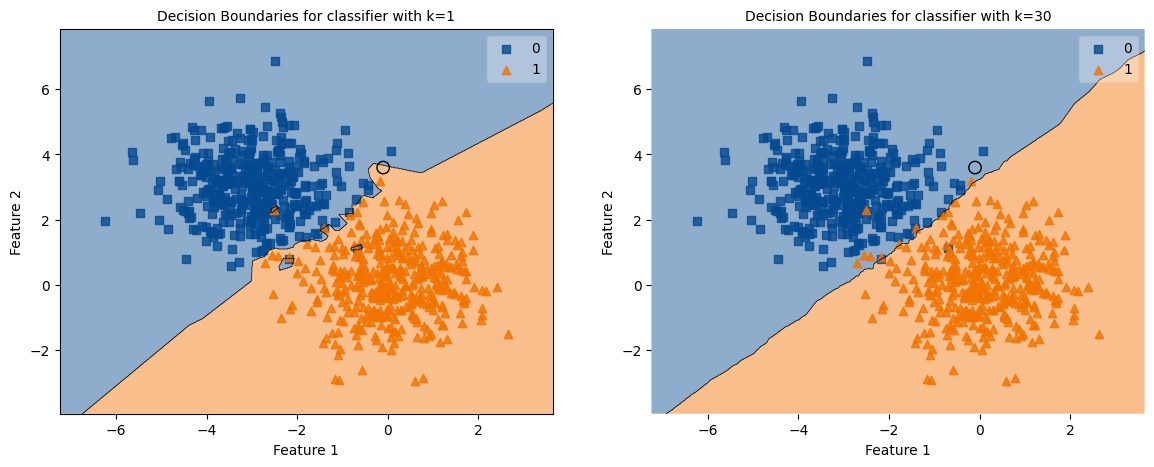

In [80]:
# Decision boundaries for classifier with k=1
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(x_train, y_train)

# plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plot_decision_regions(X = x_train, 
                      y = y_train,
                      X_highlight = np.array([[f1, f2]]),
                      clf = clf, 
                      colors='#054a91,#f17300', 
                      scatter_kwargs={'edgecolor':None}, 
                      hide_spines=False, ax=ax1)

# Give labels to the axes
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundaries for classifier with k=1', size=10)

# Decision boundaries for classifier with k=30
clf = KNeighborsClassifier(n_neighbors = 30)
clf.fit(x_train, y_train)

# plot
plot_decision_regions(X = x_train, 
                      y = y_train,
                      X_highlight = np.array([[f1, f2]]),
                      clf = clf, 
                      colors='#054a91,#f17300', 
                      scatter_kwargs={'edgecolor':None}, ax=ax2)

# Give labels to the axes
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Decision Boundaries for classifier with k=30', size=10);

You can see in the left plot, classifier with single neighbor results in boundaries that follows the training data closely. 

Conversely, when the number of neighbors increases, the boundaries changed quite a lot. They became smoother.

The choice of 'k' plays a pivotal role in KNN's performance.
- A smaller 'k' results in predictions that are sensitive to noise and outliers, which can lead to overfitting.
- A larger 'k' produces smoother decision boundaries and predictions that are more robust but may be biased by the majority class.

#### Choosing the best k-value

##### Approach 1 - Examine Error Rates
The one approach to determine the best k-values is to analyze the number of misclassified test data points as the numer of k increases.

We can observe the error rates for both weights `uniform` and `distance` for range of values.

In [83]:
error_uniform  = []
error_distance = []

k_range = range(1, 31)

for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, preds))

    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, preds))

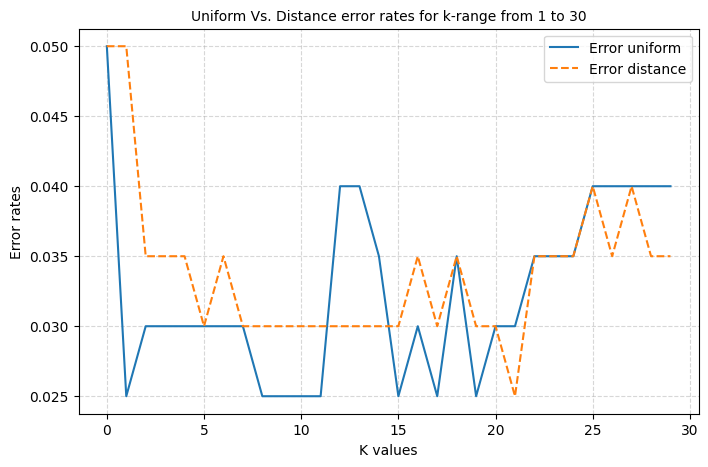

In [86]:
# Visualize the above error rates.
fig = plt.figure(figsize=(8, 5))

sns.lineplot(error_uniform, label='Error uniform')
sns.lineplot(error_distance, ls = '--', label = 'Error distance')

plt.xlabel('K values')
plt.ylabel('Error rates')
plt.title("Uniform Vs. Distance error rates for k-range from 1 to 30", size=10)

plt.grid(ls = "--", alpha=0.5)
plt.legend();

You can see in the above plot that, 

1. The solid line sits below the dashed line. This suggest the uniform distribution of the weights results in lower error rates.
2. The number on the y-axis are quite small. Therefore, any value of k would do the job.

##### Approach 2 - Grid Search
The error rate examination does not solve the problem of selecting the best value of k. 

We can use another approach `GridSearchCV` for selecting the best k-value for our model.

In [88]:
# Define parameter space to test
parameters = {
    'n_neighbors' : range(1, 30),
    'weights' : ['uniform', 'distance']
}

# Grid search instance
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           return_train_score = True)

In [89]:
# fit the model on training data
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [90]:
# get the best_estimator
grid_search.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [91]:
grid_search.best_score_

0.9875

In [92]:
# Make a score dataframe
score_df = pd.DataFrame(grid_search.cv_results_)

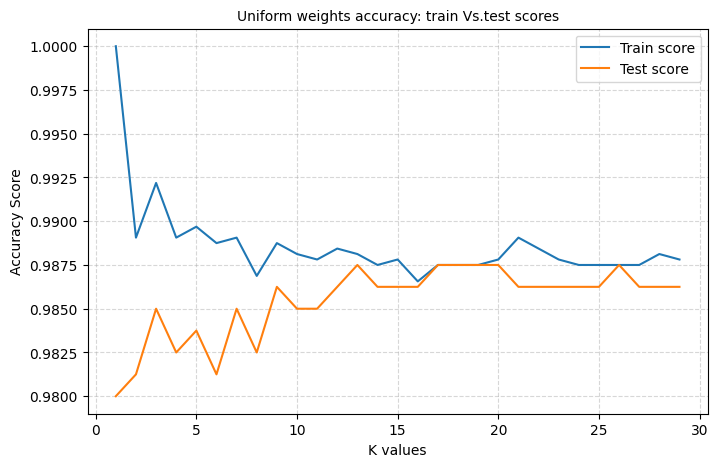

In [99]:
# plot the training & test scores
fig = plt.figure(figsize = (8, 5))

sns.lineplot(data = score_df[score_df.param_weights == 'uniform'], 
             x = 'param_n_neighbors', 
             y = 'mean_train_score',
             label = 'Train score')

sns.lineplot(data = score_df[score_df.param_weights == 'uniform'], 
             x = 'param_n_neighbors', 
             y = 'mean_test_score',
             label = 'Test score')

plt.legend()
plt.grid(ls='--', alpha = 0.5)

plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Uniform weights accuracy: train Vs.test scores', size=10);

The above plot shows the training and test accuracy score of the classifier on the y-axis, and the range of neighbors from 1 to 30 on the x-axis.

You can see the effect of overfitting and underfitting as values of k changes.

- When k=1, the score for training set is perfect.
- But when more neighobrs added, when k=30, model becomes simple and accuracy drops.
- Test score for single neighbors is lower than when score with more neighbors.
- You can see that, the best performance is somewhere in the middle, using 13 neighbors.

But if you noticed, the difference between accuracies is very small. The worst performance of classifier is around 98% accuracy. 

This is mainly happend because we are using randomly generated data values but real-world data will always be more noisy. 

#### Model Predictions

Consider the best estimator from the grid search and evaluate the model performance.

In [101]:
# Best classifier
best_clf = grid_search.best_estimator_

# fit on the training data
best_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [102]:
# Make predictions
y_preds = best_clf.predict(x_test)

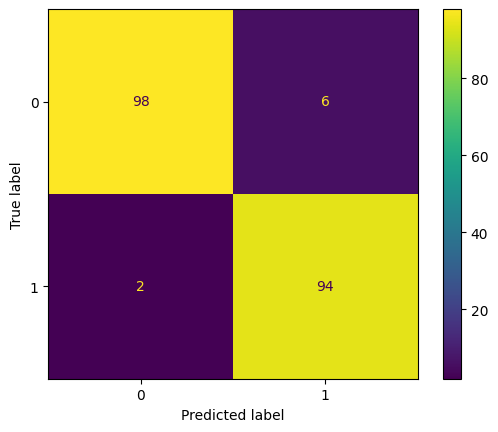

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, labels = clf.classes_);

In [105]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       104
           1       0.94      0.98      0.96        96

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

